In [1]:
from math import inf
import numpy as np
import matplotlib.pyplot as plt
import subprocess

%matplotlib inline

In [76]:
xs = -2
xe = 2
ys = -2
ye = 2
xtics = 11
ytics = 11
num_p = 4001
x,y = np.meshgrid(np.linspace(xs, xe, num_p), np.linspace(ys, ye, num_p))

inf_comp = np.array(complex(inf, inf))
nanj = np.complex128(np.nan+(np.nan)*1j)

In [81]:
z = x + y*1j
iters = np.ones(z.shape)*np.inf
num_iter = 500
limit = 2
c = 0.154057

for i in range(1, num_iter+2):
    z = np.square(z) + c/z
    np.nan_to_num(z, copy=False, posinf=True)
    # z = np.square(z) + c
    cond = i/(np.abs(z)>=limit)
    iters = np.minimum(cond, iters)

<ipython-input-81-94d8d7b90411>:8: RuntimeWarning: divide by zero encountered in true_divide
  z = np.square(z) + c/z
<ipython-input-81-94d8d7b90411>:8: RuntimeWarning: invalid value encountered in true_divide
  z = np.square(z) + c/z
<ipython-input-81-94d8d7b90411>:11: RuntimeWarning: divide by zero encountered in true_divide
  cond = i/(np.abs(z)>=limit)
<ipython-input-81-94d8d7b90411>:8: RuntimeWarning: overflow encountered in square
  z = np.square(z) + c/z
<ipython-input-81-94d8d7b90411>:8: RuntimeWarning: invalid value encountered in square
  z = np.square(z) + c/z
<ipython-input-81-94d8d7b90411>:11: RuntimeWarning: overflow encountered in absolute
  cond = i/(np.abs(z)>=limit)
<ipython-input-81-94d8d7b90411>:8: RuntimeWarning: overflow encountered in true_divide
  z = np.square(z) + c/z


In [82]:
print(np.max(iters))
print(np.min(iters))
print(np.isnan(z[500][500]))
-0.7269 + 0.1889j
print(np.abs(z[0][0])>2)

235.0
1.0
False
False


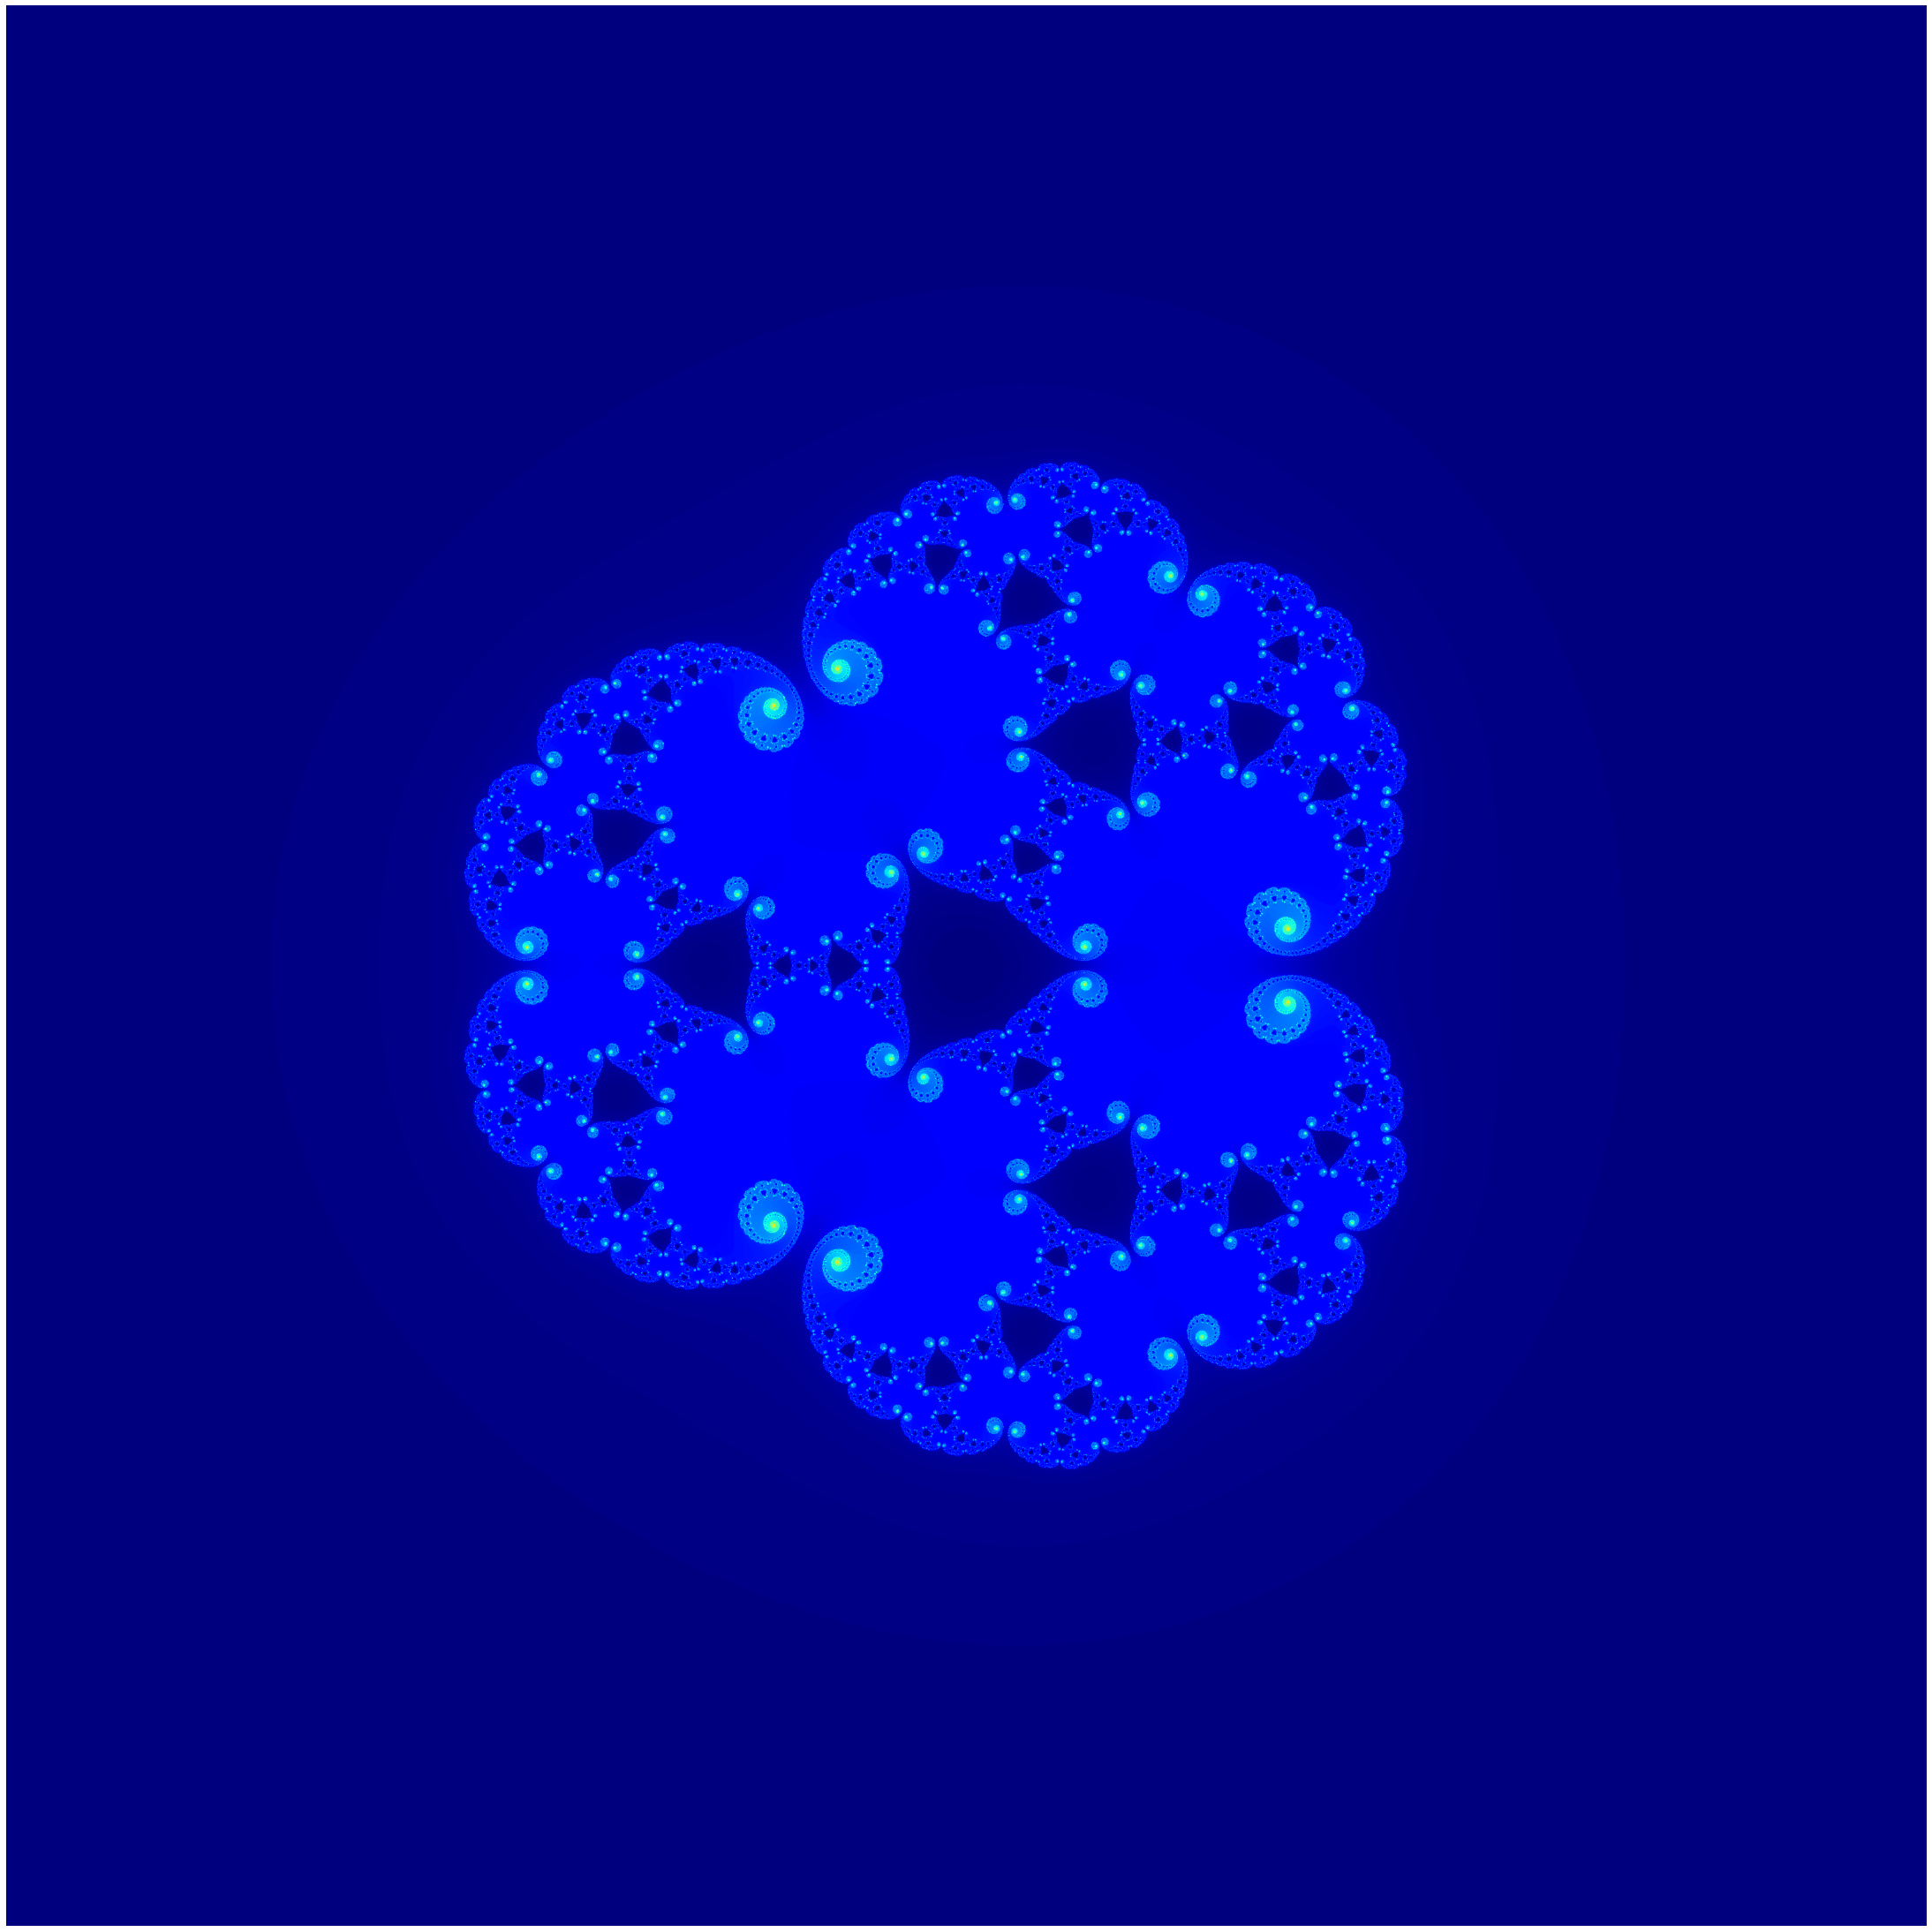

In [84]:
name = "zubieta_julia.png"

fig, ax = plt.subplots(figsize=(40, 40))
iters[iters == np.NINF] = np.max(iters)+1
ax.imshow(iters,cmap=plt.cm.jet)
plt.axis("off")
plt.plot()
plt.savefig("../images/"+name, bbox_inches='tight')

In [85]:
print(subprocess.check_output("cd ../sample_images && python3 reduce_size.py", shell=True, text=True))

saved image sierpinski_curve.jpeg
saved image dragon_curve.jpeg
saved image sierpinski_triangle.jpeg
saved image newton_fractal.jpeg
saved image cesaro_curve.jpeg
saved image koch_antisnowflake.jpeg
saved image zubieta_julia.jpeg
saved image levy_L_curve.jpeg
saved image buddhabrot.jpeg
saved image another_sierpinski_curve.jpeg
saved image peano_curve.jpeg
saved image koch_snowflake.jpeg
saved image sierpinski_carpet.jpeg
saved image twindragon_curve.jpeg
saved image mandelbrot.jpeg
saved image levy_standard_curve.jpeg
saved image koch_peano_curve.jpeg
saved image tribrot.jpeg
saved image julia.jpeg
saved image hilbert_curve.jpeg

